### Compositional analysis of DMD Cardiomyocytes snRNA-Seq dataset using `ScCoda`
- **Developed by**: Srivalli Kolla
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 19_06_2024
- **Last modified**: 19_06_2024

# Import statements and environments

In [34]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

### Set up working environment

In [35]:
sc.settings.verbosity = 3
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

# Data preparation

## Data loading

In [36]:
adata = sc.read_h5ad("../../data/heart_mm_nuclei-23-0092_CMC_states_ctl240131.raw.h5ad")
adata

AnnData object with n_obs × n_vars = 8257 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Data cleanup

In [37]:
adata.obs['cell_types'] = adata.obs['C_scANVI'].copy()
del adata.obs['cell_type'] 
adata.obs

,cell_source,donor,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,cell_states,...,pct_counts_ribo,percent_mt2,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,C_scANVI,cell_types
ACACTGATCATTATCC-1-A9_2,HIRI-Nuclei,A9_2,19942.757483,3851,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.040051,0.000267,0.046726,0.0,-0.218301,-0.450239,0,2,vCM2,vCM2
TCTTCCTGTCATAACC-1-A9_2,HIRI-Nuclei,A9_2,18663.787312,3577,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.067087,0.000268,0.080504,0.0,0.084806,-0.395886,0,2,vCM2,vCM2
ATCTCTAGTTTCAGAC-1-A9_2,HIRI-Nuclei,A9_2,19071.693405,3632,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.060124,0.000067,0.053444,0.0,-0.352962,-0.206640,0,2,vCM2,vCM2
TGAATGCAGCTCCATA-1-A9_2,HIRI-Nuclei,A9_2,19333.201556,3691,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.127786,0.001633,0.078092,1.0,-0.159373,-0.494394,0,2,vCM2,vCM2
GCAGCTGCACAAGTGG-1-A9_2,HIRI-Nuclei,A9_2,19636.587384,3778,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.077876,0.001062,0.028319,0.0,0.351369,-0.141495,0,2,vCM2,vCM2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CATGAGTAGATGGTCG-1-B2_2,HIRI-Nuclei,B2_2,5015.883804,691,NaN,NaN,NaN,B2_2,NaN,NaN,...,2.202643,0.073128,0.088106,0.0,0.470334,0.083699,5,4,vCM3,vCM3
CGGTCAGCAATCGCAT-1-B2_2,HIRI-Nuclei,B2_2,4527.495736,616,NaN,NaN,NaN,B2_2,NaN,NaN,...,1.537071,0.111212,0.632911,0.0,0.266868,-0.118650,5,4,vCM4,vCM4
ACGTAACAGCGTGTTT-1-B2_2,HIRI-Nuclei,B2_2,4506.829197,604,NaN,NaN,NaN,B2_2,NaN,NaN,...,3.258845,0.219739,0.000000,0.0,-0.067282,-0.111107,5,4,vCM4,vCM4
GCGTTTCTCTAGTTCT-1-B2_2,HIRI-Nuclei,B2_2,4543.968170,611,NaN,NaN,NaN,B2_2,NaN,NaN,...,5.243446,0.131086,0.000000,0.0,0.119838,0.054368,5,4,vCM4,vCM4


In [38]:
mdx_data = adata[adata.obs['genotype'].isin(['WT', 'Mdx'])].copy()
mdxscid_data = adata[adata.obs['genotype'].isin(['WT', 'MdxSCID'])].copy()


# ScCODA - All

In [39]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(adata, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_data

MuData object with n_obs × n_vars = 8263 × 32289
  2 modalities
    rna:	8257 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	6 x 4
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

In [40]:
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key= 'coda', formula= 'genotype')
sccoda_model.run_nuts(sccoda_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to vCM3

sample: 100%|██████████| 11000/11000 [00:07<00:00, 1505.68it/s, 127 steps of size 3.34e-02. acc. prob=0.77]


<Axes: xlabel='Cell type', ylabel='Proportion'>

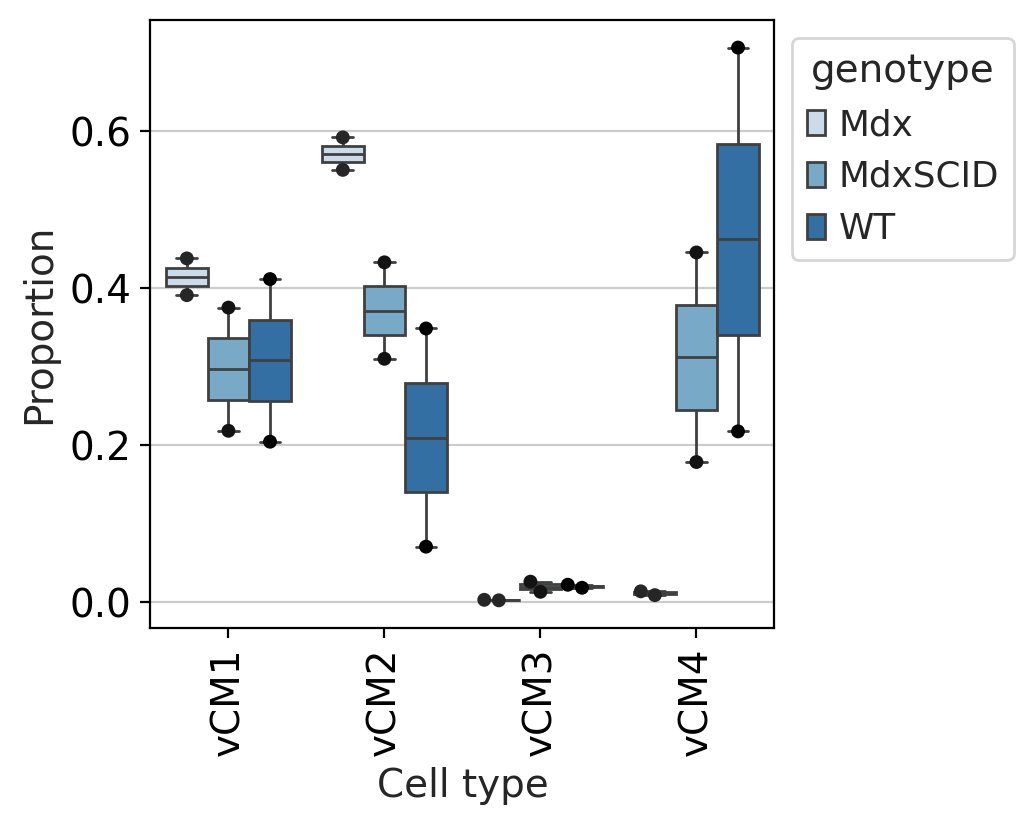

In [41]:
pt.pl.coda.boxplots(sccoda_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

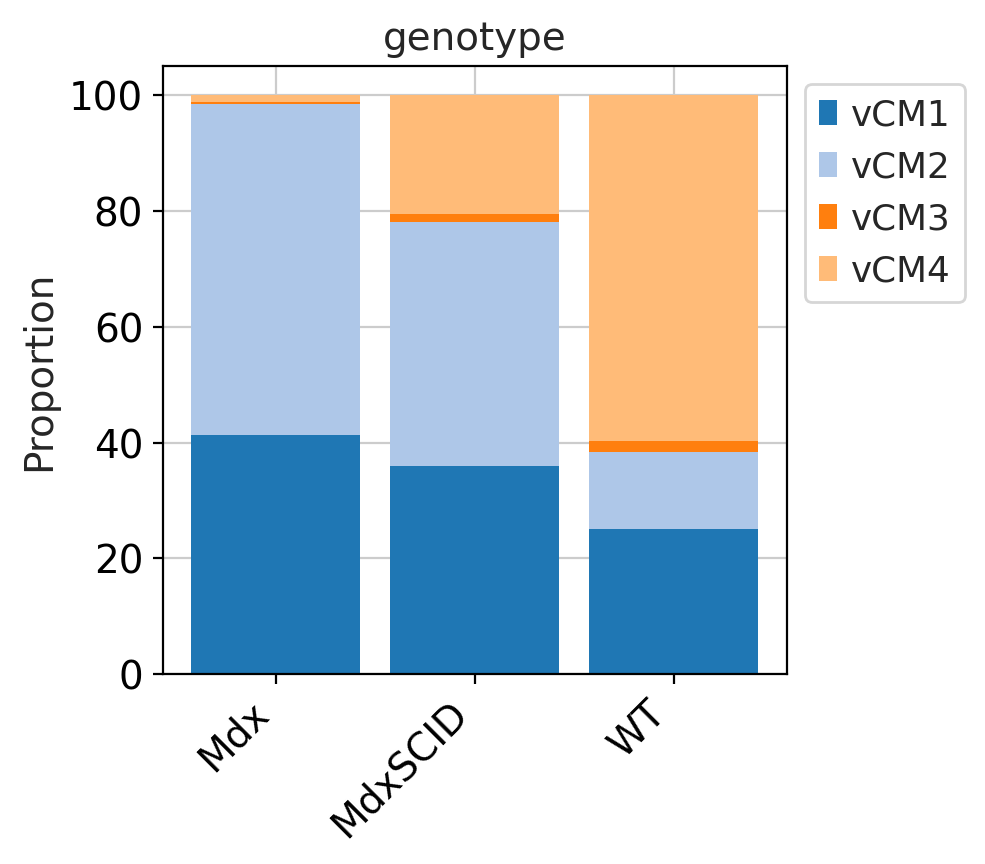

In [42]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

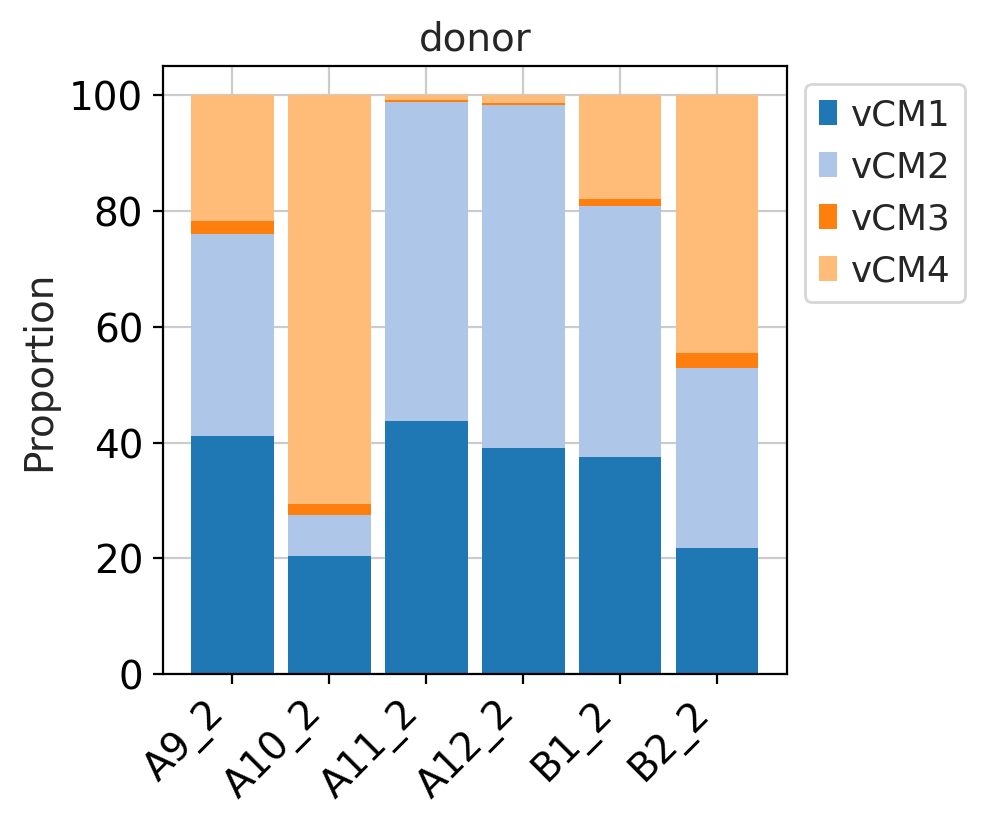

In [43]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='donor')

In [44]:
sccoda_model.set_fdr(sccoda_data, 0.05)

In [45]:
sccoda_data

MuData object with n_obs × n_vars = 8263 × 32289
  2 modalities
    rna:	8257 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	6 x 4
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.MdxSCID]', 'effect_df_genotype[T.WT]'

In [46]:
sccoda_data['coda'].varm['effect_df_genotype[T.MdxSCID]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
vCM1,0.0,-3.000,0.866,0.765,0.4736,547.966756,0.0
vCM2,0.0,-3.134,0.898,0.803,0.4895,646.268221,0.0
vCM3,0.0,0.000,0.000,0.000,0.0000,55.435192,0.0
vCM4,0.0,-0.360,2.683,0.883,0.6769,126.496498,0.0


In [47]:
sccoda_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
vCM1,0.0,-3.768,0.623,1.019,0.5497,547.966756,0.0
vCM2,0.0,-4.170,0.254,1.244,0.7144,646.268221,0.0
vCM3,0.0,0.000,0.000,0.000,0.0000,55.435192,0.0
vCM4,0.0,-0.272,2.648,0.863,0.6858,126.496498,0.0


In [48]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate            Cell Type
genotype[T.MdxSCID]  vCM1         False
                     vCM2         False
                     vCM3         False
                     vCM4         False
genotype[T.WT]       vCM1         False
                     vCM2         False
                     vCM3         False
                     vCM4         False
Name: Final Parameter, dtype: bool

# ScCODA - Mdx

In [49]:
mdx_model = pt.tl.Sccoda()
sccoda_mdx_data = mdx_model.load(mdx_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdx_data

MuData object with n_obs × n_vars = 5932 × 32289
  2 modalities
    rna:	5928 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 4
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

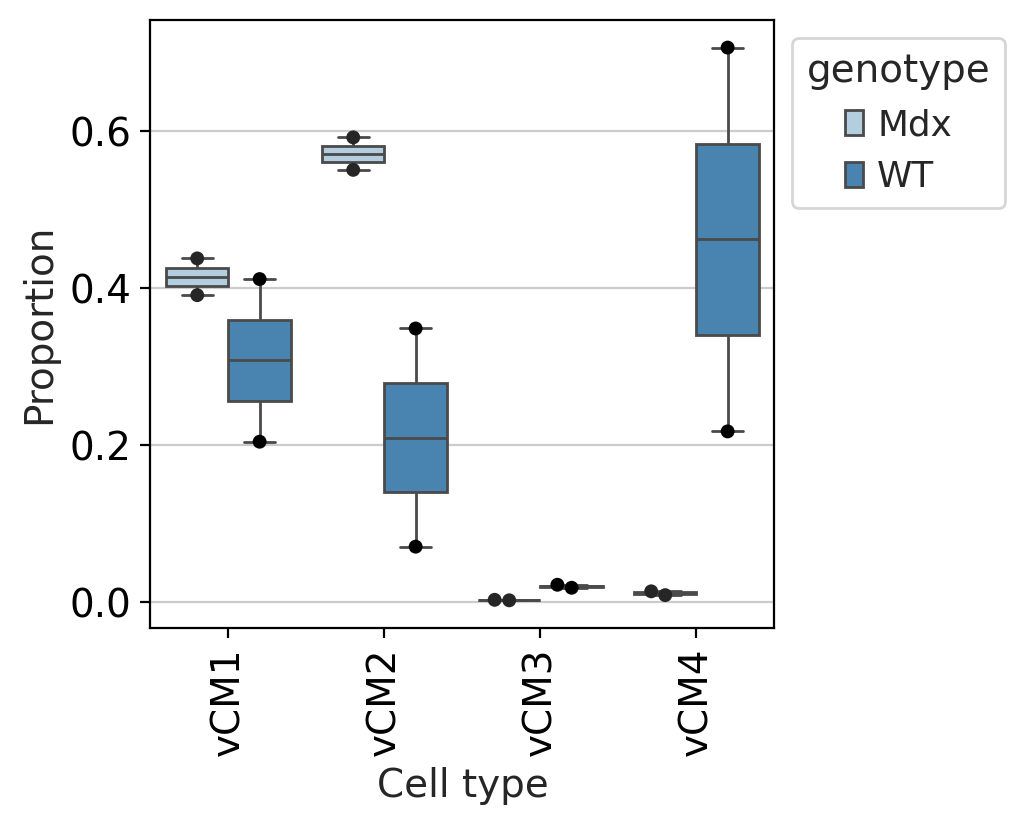

In [50]:
pt.pl.coda.boxplots(sccoda_mdx_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

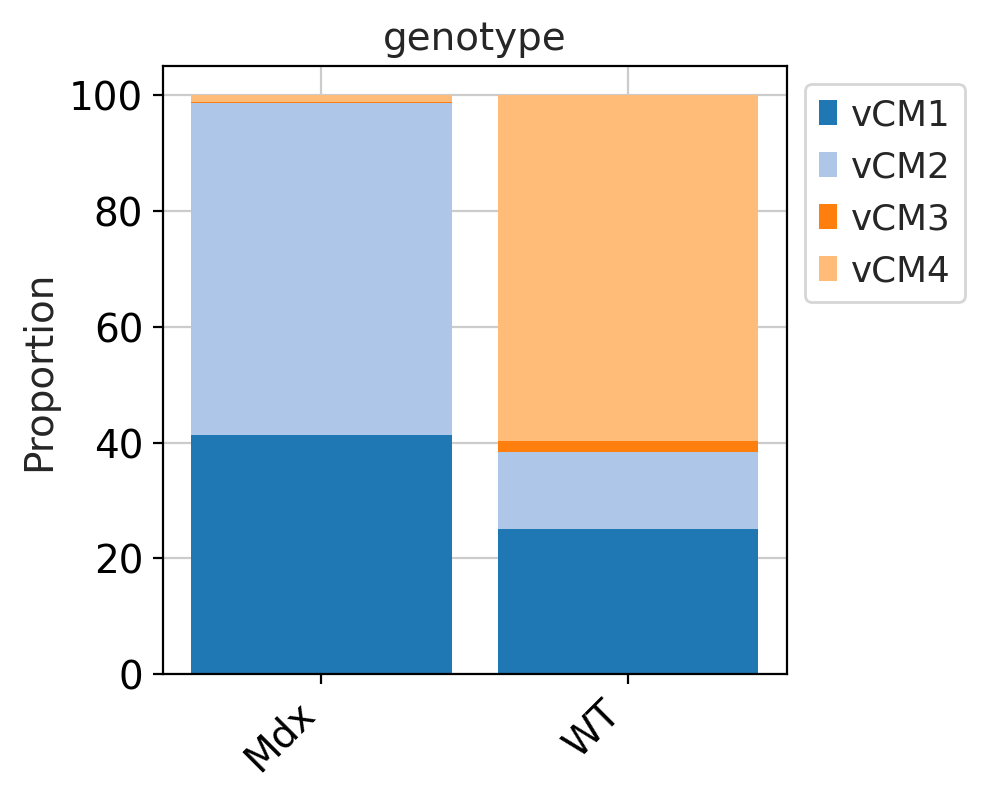

In [51]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

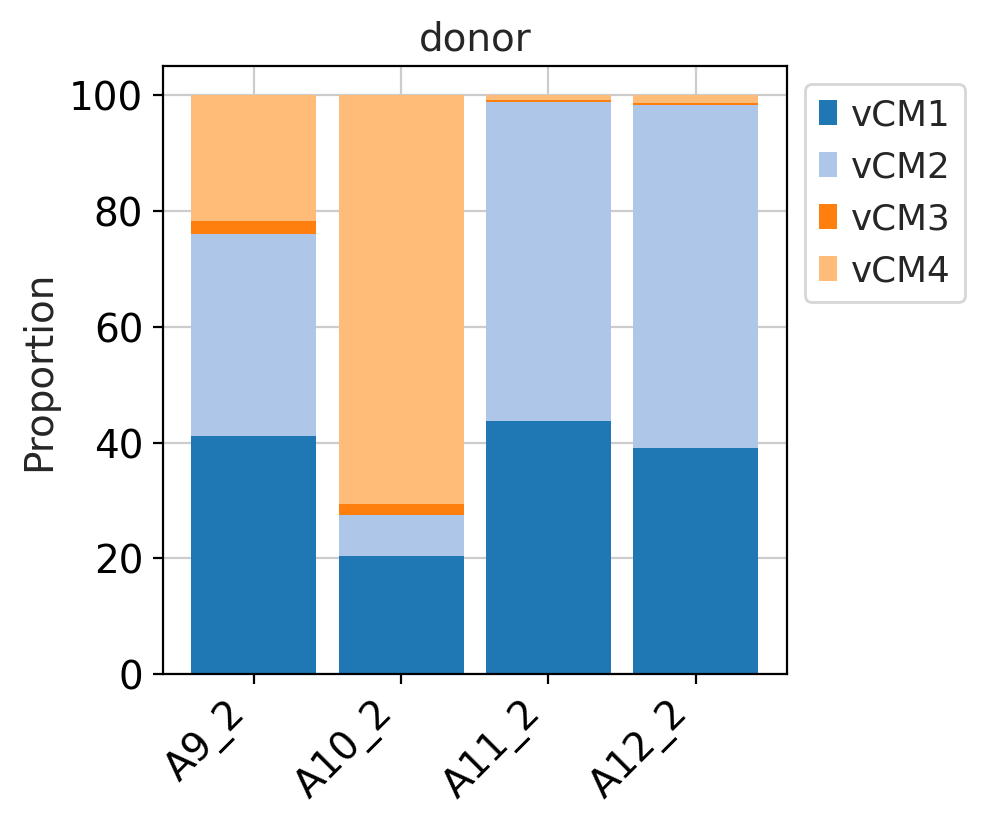

In [52]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='donor')

In [53]:
sccoda_mdx_data = mdx_model.prepare(sccoda_mdx_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdx_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to vCM3

sample: 100%|██████████| 11000/11000 [00:06<00:00, 1717.69it/s, 127 steps of size 1.73e-02. acc. prob=0.84]


In [54]:
mdx_model.set_fdr(sccoda_mdx_data, 0.05)

In [55]:
sccoda_mdx_data

MuData object with n_obs × n_vars = 5932 × 32289
  2 modalities
    rna:	5928 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 4
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [56]:
sccoda_mdx_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
vCM1,0.0,-4.760,0.079,1.593,0.8539,618.772722,0.0
vCM2,0.0,-5.489,0.011,1.764,0.9137,817.898329,0.0
vCM3,0.0,0.000,0.000,0.000,0.0000,10.802073,0.0
vCM4,0.0,-0.663,3.065,0.873,0.4762,34.526876,0.0


In [57]:
mdx_model.credible_effects(sccoda_mdx_data, modality_key="coda")

Covariate       Cell Type
genotype[T.WT]  vCM1         False
                vCM2         False
                vCM3         False
                vCM4         False
Name: Final Parameter, dtype: bool

# ScCODA - MdxSCID

In [58]:
mdxscid_model = pt.tl.Sccoda()
sccoda_mdxscid_data = mdxscid_model.load(mdxscid_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 5752 × 32289
  2 modalities
    rna:	5748 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 4
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

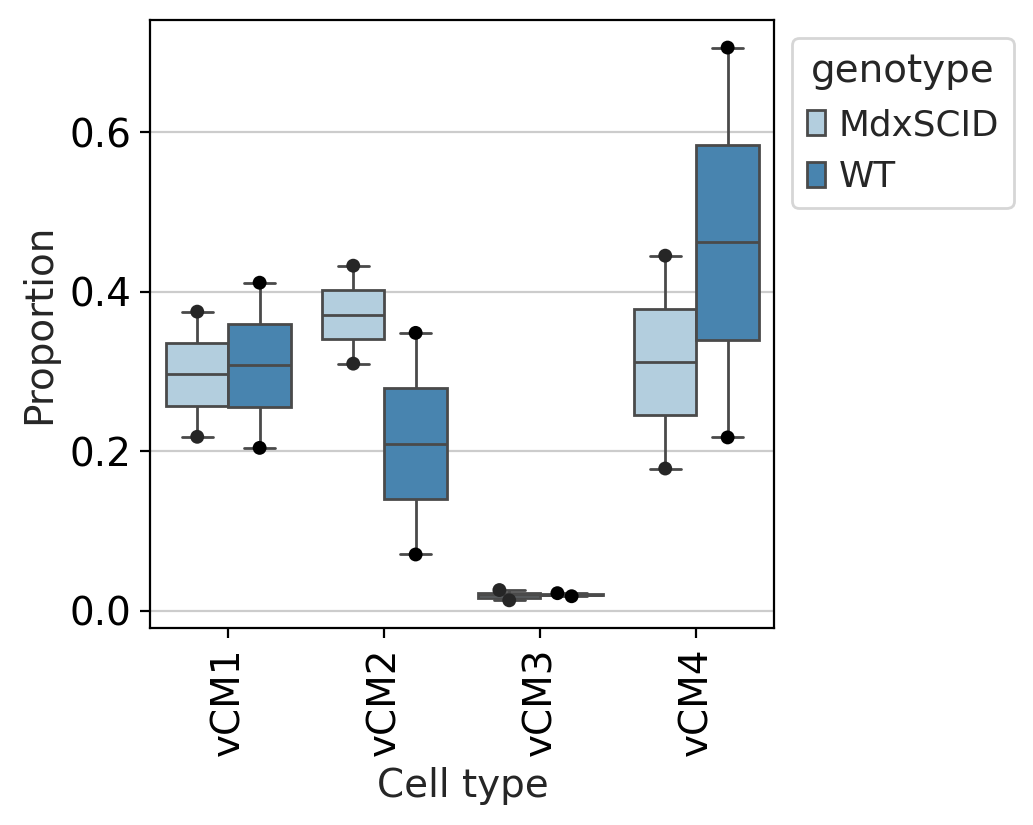

In [59]:
pt.pl.coda.boxplots(sccoda_mdxscid_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

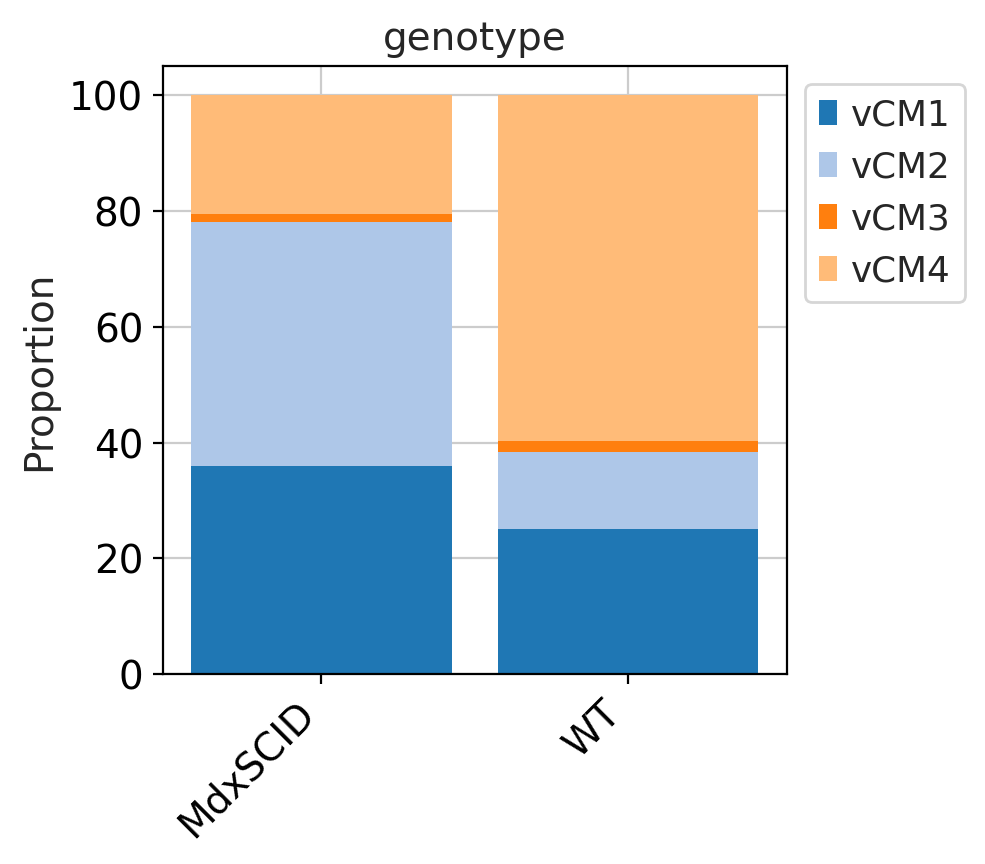

In [60]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

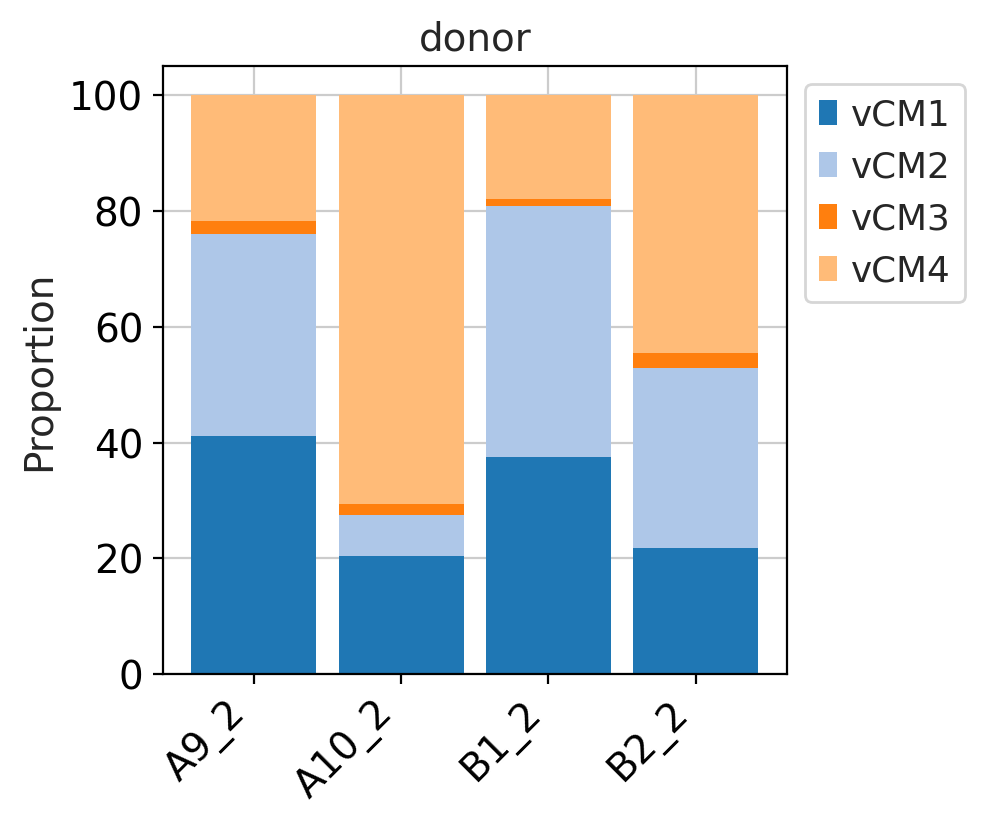

In [61]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='donor')

In [62]:
sccoda_mdxscid_data = mdx_model.prepare(sccoda_mdxscid_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdxscid_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to vCM3

sample: 100%|██████████| 11000/11000 [00:03<00:00, 2818.28it/s, 31 steps of size 9.21e-02. acc. prob=0.79]


In [63]:
mdx_model.set_fdr(sccoda_mdxscid_data, 0.05)

In [64]:
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 5752 × 32289
  2 modalities
    rna:	5748 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 4
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [65]:
sccoda_mdxscid_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
vCM1,0.0,-1.046,0.710,0.300,0.4553,445.884198,0.0
vCM2,0.0,-1.538,0.448,0.473,0.5669,425.412494,0.0
vCM3,0.0,0.000,0.000,0.000,0.0000,75.872877,0.0
vCM4,0.0,-0.591,1.050,0.288,0.4454,489.830431,0.0


In [66]:
mdx_model.credible_effects(sccoda_mdxscid_data, modality_key="coda")

Covariate       Cell Type
genotype[T.WT]  vCM1         False
                vCM2         False
                vCM3         False
                vCM4         False
Name: Final Parameter, dtype: bool